### What is Machine Learning

- subfield of AI
- constructing models of data
- predict and understand aspects of new data

- Supervised learning learns from labeled data and consists of classification or regression tasks
- Unsupervised learning models features of data without labels and consists of clustering and dimensionality reduction
- Semi-supervised learning falls between these two categories

### Introducing Scikit-Learn

- package that provides efficient versions of many common algorithms

### Data Representations in Scikit-Learn

In [1]:
# data as a table
# rows are observations, columns are features

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/Users/jujohnson/anaconda3/envs/tf.latest/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


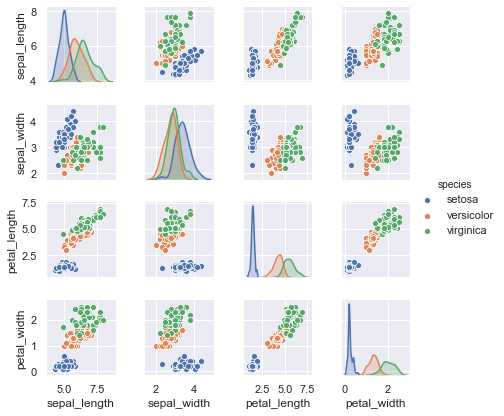

In [4]:
# X is feature matrix
# y is the target array (labels)
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris.species
y_iris.shape

(150,)

### Scikit-Learn's Estimator API

- all objects share common interface
- all parameter values are exposed as attributes
- machine learning algorithms can be composed
- sensible defaults

### API Basics

1. import a estimator
2. instantiate model with desired hyperparameters
3. arrange data into feature matrix and target vector
4. fit the model to your training data
5. apply the model to the new data using predict() or transform()

### Simple Example

In [8]:
import matplotlib.pyplot as plt
import numpy as np

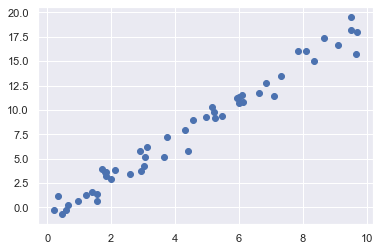

In [9]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [14]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
model.coef_

array([1.9776566])

In [16]:
model.intercept_

-0.9033107255311164

In [18]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

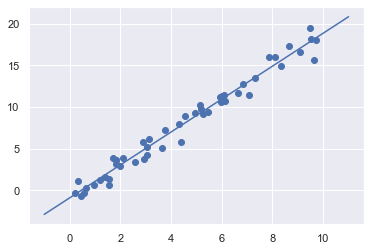

In [20]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Naive Bayes Example

Naive Bayes assumes each class is drawn from an axis-aligned Gaussian distribution.

Very fast and no hyperparameters to tune.

Good baseline.

In [23]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)
print(Xtest.shape, ytest.shape)

(38, 4) (38,)


In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised Learning - Iris Dimensionality

In [26]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

In [27]:
X_2D.shape

(150, 2)

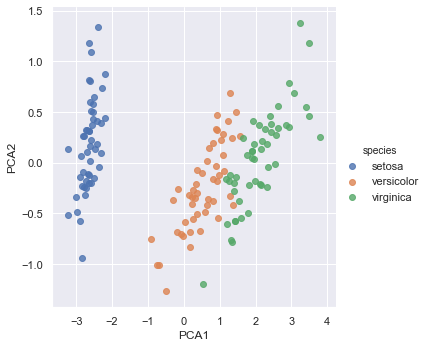

In [28]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False);

### Unsupervised Iris Clustering

In [30]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

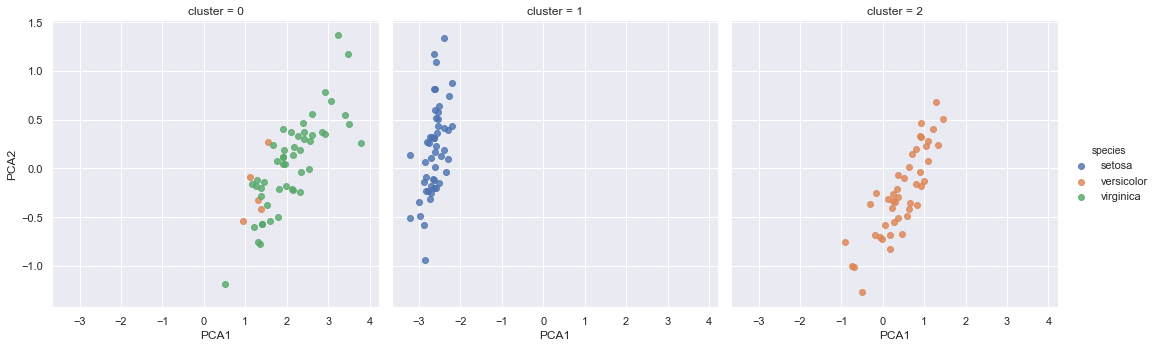

In [31]:
iris['cluster'] = y_gmm

sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

### Exploring Hand-written Digits

In [36]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

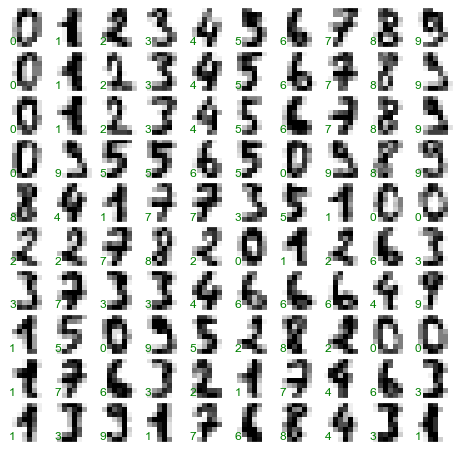

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes,
           color='green')

In [40]:
X = digits.data
X.shape

(1797, 64)

In [41]:
y = digits.target
y.shape

(1797,)

In [42]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

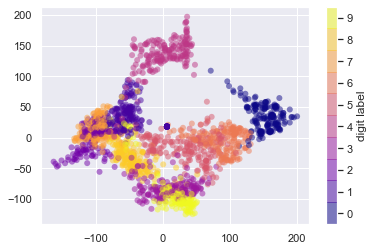

In [47]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
           edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('plasma', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [48]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, Ytrain)
y_model = model.predict(Xtest)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, y_model)

0.8288888888888889

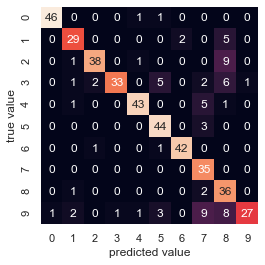

In [54]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

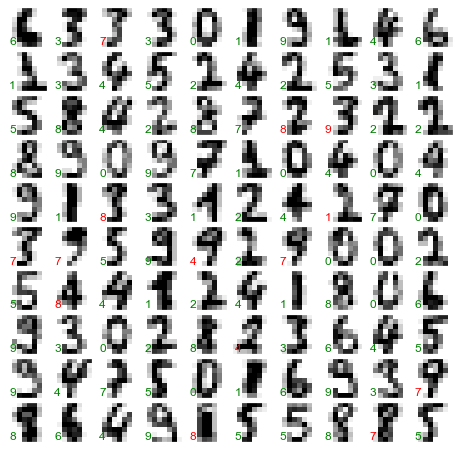

In [56]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (Ytest[i] == y_model[i]) else 'red')